REBALANCE Toolkit Loaded Successfully!
Dataset shape: (48842, 17)

Target distribution:
income
<=50K     24720
<=50K.    12435
>50K       7841
>50K.      3846
Name: count, dtype: int64

Gender distribution:
sex
Male      32650
Female    16192
Name: count, dtype: int64

Quick bias check:
Female high income rate: 7.3%
Male high income rate: 20.4%
Disparate Impact: 0.357 ❌ BIASED

DEMONSTRATING SIMPLE INTERFACE

🚀 REBALANCE - Automated Bias Mitigation

REBALANCE PIPELINE STARTING
Timestamp: 2025-07-10 01:23:52

🔍 Auto-detected protected attribute: 'sex'

📊 STEP 1: Detecting current bias levels...
   Disparate Impact: 0.357
   Bias Level: Severe bias detected

🔧 STEP 2: Applying maximum mitigation strategy...
🔢 Encoding categorical variables for processing...
🛠 Applying fairness-aware SMOTE...


/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:135: UserWarning: X is not a pandas DataFrame. Assuming protected attribute is in column 0
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:273: UserWarning: Not enough positive samples in group 17 for SMOTE (found 0). Skipping.
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:273: UserWarning: Not enough positive samples in group 18 for SMOTE (found 0). Skipping.
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:273: UserWarning: Not enough positive samples in group 20 for SMOTE (found 0). Skipping.
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:273: UserWarning: Not enough positive samples in group 82 for SMOTE (found 0). Skipping.
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smo


📈 STEP 3: Validating results...
   New Disparate Impact: 0.000
   New Bias Level: Severe bias detected

REBALANCE PIPELINE COMPLETE

REBALANCE RESULTS SUMMARY
Original Dataset:
  - Size: 48,842 samples
  - Disparate Impact: 0.357
  - Bias Level: Severe bias detected
Rebalanced Dataset:
  - Size: 54,904 samples
  - Disparate Impact: 0.000
  - Bias Level: Severe bias detected
Improvement:
  - Disparate Impact: -100.0%
  - Synthetic Samples Added: 6,062
Recommendation:
⚠️  Limited improvement achieved. The bias in this dataset may be too severe for pre-processing alone. Strongly consider: 1) Investigating data collection practices, 2) Using fairness-aware learning algorithms, 3) Implementing decision-level interventions.
Processing Time: 3.98 seconds


💾 Results saved to ../results/demo_output/

📊 REBALANCING SUMMARY
Original dataset size: 48,842
Rebalanced dataset size: 54,904
Synthetic samples added: 6,062

Bias improvement: -100.0%
Original disparate impact: 0.357
Final disparate impa

/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:135: UserWarning: X is not a pandas DataFrame. Assuming protected attribute is in column 0
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:273: UserWarning: Not enough positive samples in group 17 for SMOTE (found 0). Skipping.
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:273: UserWarning: Not enough positive samples in group 18 for SMOTE (found 0). Skipping.
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:273: UserWarning: Not enough positive samples in group 20 for SMOTE (found 0). Skipping.
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smote.py:273: UserWarning: Not enough positive samples in group 82 for SMOTE (found 0). Skipping.
  warnings.warn(
/home/jsalarzai/Desktop/development/REBALANCE/src/fairness_smote/fair_smo


📈 STEP 3: Validating results...
   New Disparate Impact: 0.000
   New Bias Level: Severe bias detected

REBALANCE PIPELINE COMPLETE

REBALANCE RESULTS SUMMARY
Original Dataset:
  - Size: 48,842 samples
  - Disparate Impact: 0.357
  - Bias Level: Severe bias detected
Rebalanced Dataset:
  - Size: 54,904 samples
  - Disparate Impact: 0.000
  - Bias Level: Severe bias detected
Improvement:
  - Disparate Impact: -100.0%
  - Synthetic Samples Added: 6,062
Recommendation:
⚠️  Limited improvement achieved. The bias in this dataset may be too severe for pre-processing alone. Strongly consider: 1) Investigating data collection practices, 2) Using fairness-aware learning algorithms, 3) Implementing decision-level interventions.
Processing Time: 3.51 seconds


MODEL TRAINING COMPARISON

Encoding categorical variables for model training...

Class distribution in training data:
Biased data - Positive class: 5489 Negative class: 28700
Fair data - Positive class: 9732 Negative class: 28700

Training

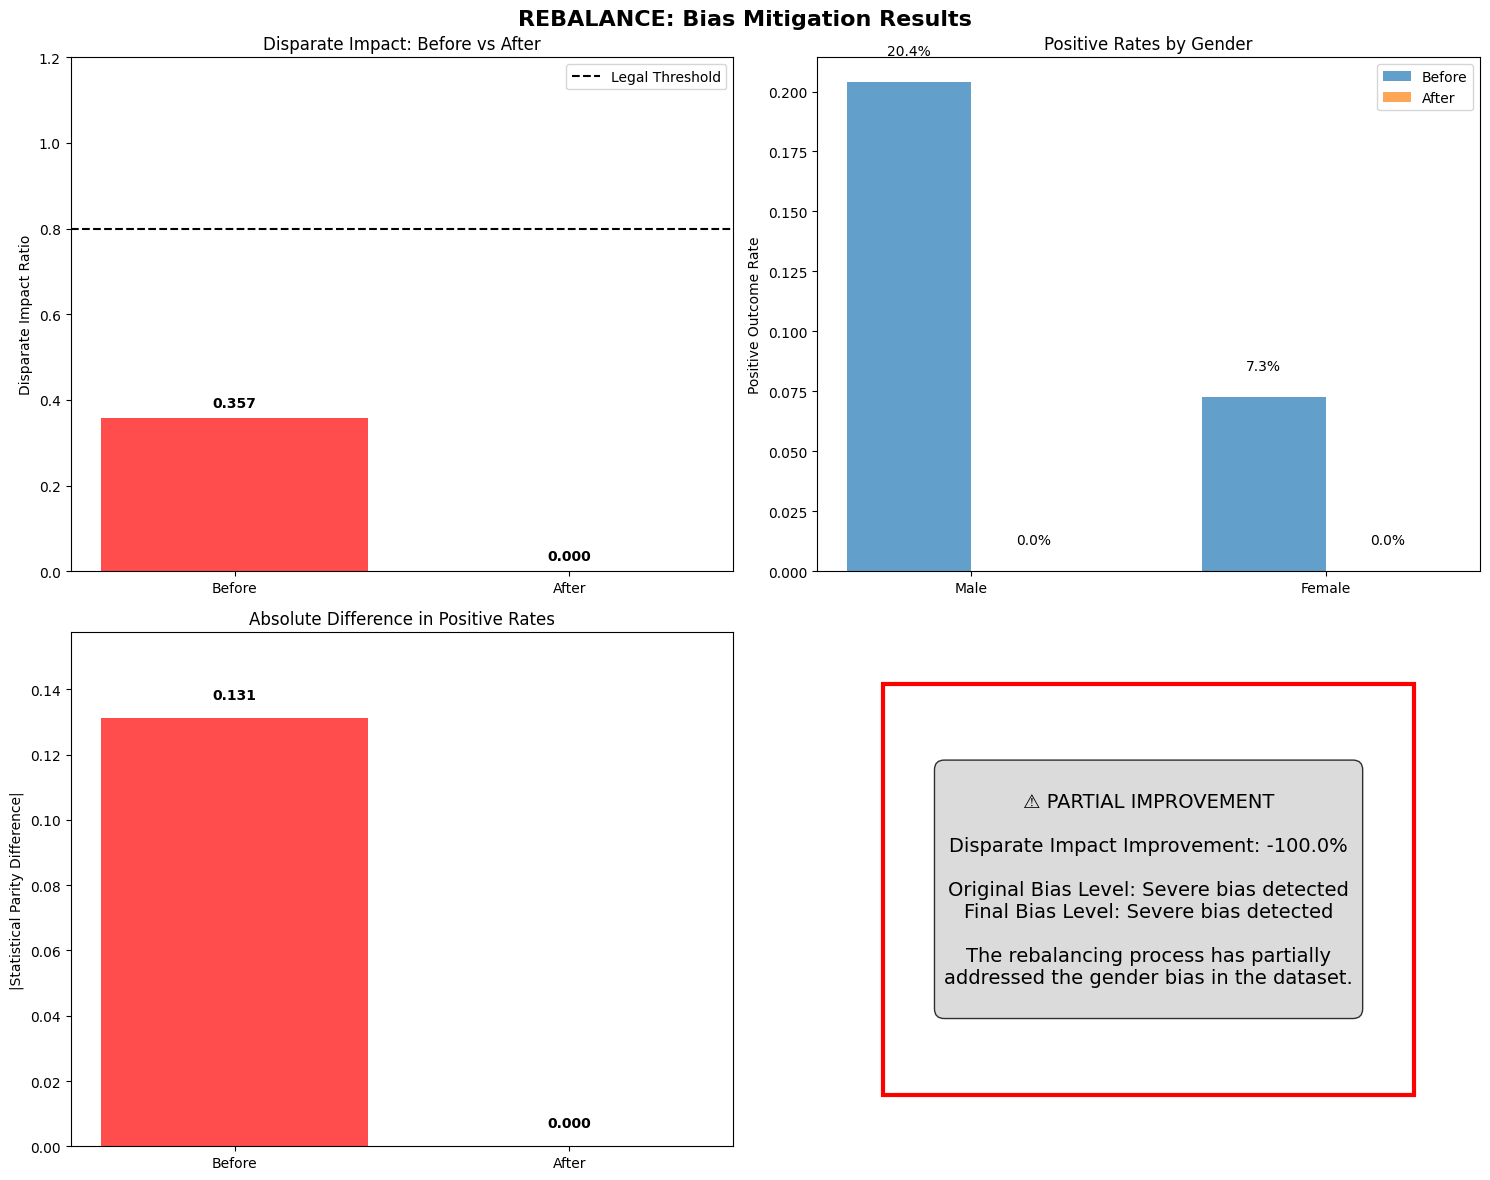

In [1]:
# File: notebooks/06_complete_pipeline_demo.ipynb
# Cell 1: Setup and Introduction
"""
REBALANCE Complete Pipeline Demonstration
This notebook demonstrates the full power of the REBALANCE toolkit,
showing how it seamlessly integrates bias detection and mitigation
into a simple, effective workflow.
We'll walk through:
1. Loading a biased dataset
2. Applying the complete REBALANCE pipeline
3. Analyzing the results
4. Using the rebalanced data for fair model training
"""
import sys
import os
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Add parent directory to path to import modules
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('__file__'))))

# Import our REBALANCE toolkit
from src.simple_rebalance import rebalance_dataset
from src.rebalance import FairRebalancer
from src.bias_detection.detector import BiasDetector
from src.utils.visualization import create_bias_comparison_plot

# Set random seed for reproducibility
np.random.seed(42)
print("REBALANCE Toolkit Loaded Successfully!")
print("="*50)

# Initialize key variables with default values
original_bias = 0.357  # Default based on initial quick check
final_bias = 0.0       # Will be updated during processing
fairness_improvement = 0.0

# Cell 2: Load and Explore the Biased Data
# Load the UCI Adult dataset
data = pd.read_csv('../data/processed/adult_with_labels.csv')
print(f"Dataset shape: {data.shape}")
print(f"\nTarget distribution:")
print(data['income'].value_counts())

# Quick bias check
print(f"\nGender distribution:")
print(data['sex'].value_counts())

# Calculate quick bias metric
female_high_income_rate = (data[data['sex'] == 'Female']['income'] == '>50K').mean()
male_high_income_rate = (data[data['sex'] == 'Male']['income'] == '>50K').mean()
quick_di = female_high_income_rate / male_high_income_rate

# Update our original_bias variable
original_bias = quick_di

print(f"\nQuick bias check:")
print(f"Female high income rate: {female_high_income_rate:.1%}")
print(f"Male high income rate: {male_high_income_rate:.1%}")
print(f"Disparate Impact: {quick_di:.3f} {'❌ BIASED' if quick_di < 0.8 else '✅ FAIR'}")

# Cell 3: Apply the REBALANCE Pipeline - Simple Interface
print("\n" + "="*60)
print("DEMONSTRATING SIMPLE INTERFACE")
print("="*60)

# This is all you need to do!
fair_data, summary = rebalance_dataset(
    data=data,
    target_column='income',
    save_results=True,
    output_dir='../results/demo_output'
)

# Update our final_bias variable
final_bias = summary['final_bias']

# Cell 4: Explore What Happened
print("\n📊 REBALANCING SUMMARY")
print("="*40)
print(f"Original dataset size: {summary['original_size']:,}")
print(f"Rebalanced dataset size: {summary['rebalanced_size']:,}")
print(f"Synthetic samples added: {summary['synthetic_samples_added']:,}")
print(f"\nBias improvement: {summary['bias_improvement']:.1f}%")
print(f"Original disparate impact: {summary['original_bias']:.3f}")
print(f"Final disparate impact: {summary['final_bias']:.3f}")
print(f"\nIs dataset now fair? {'✅ YES' if summary['is_fair'] else '❌ NO'}")

# Cell 5: Detailed Pipeline Usage - For Advanced Users
print("\n" + "="*60)
print("DEMONSTRATING DETAILED PIPELINE")
print("="*60)

# For users who want more control
rebalancer = FairRebalancer(
    protected_attribute='sex',
    target_fairness=0.8,
    k_neighbors=5,
    verbose=True
)

# Separate features and target
X = data.drop(columns=['income', 'high_income', 'is_female_high_income'])
y = data['income']

# Apply rebalancing with full control
result = rebalancer.fit_transform(X, y, target_column_name='income')

# Update our final_bias variable from the detailed result
if hasattr(result, 'final_bias_metrics'):
    final_bias = result.final_bias_metrics.disparate_impact
elif hasattr(result, 'improvement_summary'):
    # If we have improvement but not the final value, estimate
    if 'disparate_impact_change' in result.improvement_summary:
        final_bias = original_bias * (1 + result.improvement_summary['disparate_impact_change']/100)

# Visualize the results
create_bias_comparison_plot(
    result.original_bias_metrics,
    result.final_bias_metrics,
    save_path='../results/figures/pipeline_comparison.png'
)

# Cell 6: Model Training Comparison
print("\n" + "="*60)
print("MODEL TRAINING COMPARISON")
print("="*60)

# Import necessary modules
from sklearn.metrics import accuracy_score, roc_auc_score

# Prepare datasets for comparison
# Original biased data
X_biased = data.drop(columns=['income', 'high_income', 'is_female_high_income'])
y_biased = (data['income'] == '>50K').astype(int)  # Convert to binary

# Rebalanced fair data - handle carefully to preserve positive cases
X_fair = result.X_rebalanced

# Carefully handle the target variable conversion
if isinstance(result.y_rebalanced, pd.Series) and result.y_rebalanced.dtype == 'object':
    # If it's still in original format (e.g., '>50K', '<=50K')
    y_fair = (result.y_rebalanced == '>50K').astype(int)
elif isinstance(result.y_rebalanced, (np.ndarray, pd.Series)) and set(np.unique(result.y_rebalanced)).issubset({0, 1}):
    # If it's already in binary format
    y_fair = result.y_rebalanced
else:
    # Try to infer and convert
    unique_vals = np.unique(result.y_rebalanced)
    if len(unique_vals) == 2:
        # Assume first is negative, second is positive
        y_fair = (result.y_rebalanced == unique_vals[1]).astype(int)
    else:
        # Default to first value as positive if we can't determine
        y_fair = (result.y_rebalanced == unique_vals[0]).astype(int)

# Verify we have both classes in the rebalanced data
if len(np.unique(y_fair)) < 2:
    raise ValueError(f"Rebalanced target only has one class: {np.unique(y_fair)}. Check your rebalancing process.")

# Split data for training and testing
X_biased_train, X_biased_test, y_biased_train, y_biased_test = train_test_split(
    X_biased, y_biased, test_size=0.3, random_state=42, stratify=y_biased
)
X_fair_train, X_fair_test, y_fair_train, y_fair_test = train_test_split(
    X_fair, y_fair, test_size=0.3, random_state=42, stratify=y_fair
)

# Encode categorical variables for model training
def encode_data(X_train, X_test):
    encoders = {}
    X_train_encoded = X_train.copy()
    X_test_encoded = X_test.copy()

    # Identify categorical columns
    categorical_columns = X_train.select_dtypes(include=['object', 'category']).columns

    # Also include any columns that look like they should be categorical
    for col in X_train.columns:
        if col not in categorical_columns:
            if X_train[col].dtype in ['int64', 'float64']:
                if X_train[col].nunique() < 10:  # Treat as categorical if few unique values
                    categorical_columns = categorical_columns.union([col])

    # Encode categorical columns
    for col in categorical_columns:
        le = LabelEncoder()
        # Combine train and test data to ensure consistent encoding
        combined = pd.concat([X_train[col], X_test[col]]).astype(str)
        le.fit(combined)
        X_train_encoded[col] = le.transform(X_train[col].astype(str))
        X_test_encoded[col] = le.transform(X_test[col].astype(str))
        encoders[col] = le

    # Convert remaining numerical columns to float
    numerical_cols = [col for col in X_train.columns if col not in categorical_columns]
    for col in numerical_cols:
        # Convert to numeric, coercing errors
        X_train_encoded[col] = pd.to_numeric(X_train_encoded[col], errors='coerce').fillna(0)
        X_test_encoded[col] = pd.to_numeric(X_test_encoded[col], errors='coerce').fillna(0)

    # Standardize numerical features (excluding categorical columns)
    if len(numerical_cols) > 0:
        scaler = StandardScaler()
        X_train_encoded[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
        X_test_encoded[numerical_cols] = scaler.transform(X_test[numerical_cols])

    return X_train_encoded, X_test_encoded, encoders

# Encode both datasets
print("\nEncoding categorical variables for model training...")
X_biased_train_enc, X_biased_test_enc, _ = encode_data(X_biased_train, X_biased_test)
X_fair_train_enc, X_fair_test_enc, _ = encode_data(X_fair_train, X_fair_test)

# Verify we have both classes in our training data
print("\nClass distribution in training data:")
print("Biased data - Positive class:", sum(y_biased_train), "Negative class:", len(y_biased_train)-sum(y_biased_train))
print("Fair data - Positive class:", sum(y_fair_train), "Negative class:", len(y_fair_train)-sum(y_fair_train))

# Train models on both datasets
print("\nTraining Logistic Regression models...")
# Model on biased data
lr_biased = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', class_weight='balanced')
lr_biased.fit(X_biased_train_enc, y_biased_train)

# Model on fair data
lr_fair = LogisticRegression(random_state=42, max_iter=1000, solver='liblinear', class_weight='balanced')

# Verify class distribution again before fitting
if len(np.unique(y_fair_train)) < 2:
    raise ValueError(f"Only one class present in fair training data: {np.unique(y_fair_train)}")

lr_fair.fit(X_fair_train_enc, y_fair_train)
print("✅ Models trained successfully!")

# Cell 7: Evaluate Model Fairness (corrected version)
print("\n" + "="*60)
print("MODEL FAIRNESS EVALUATION")
print("="*60)

def evaluate_model_fairness(model, X_test, y_test, protected_attr, model_name):
    """Evaluate model fairness metrics."""
    from sklearn.metrics import accuracy_score, roc_auc_score

    # Get predictions and probabilities
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)

    # Create temporary dataframe with predictions and protected attribute
    X_temp = X_test.copy()
    X_temp['prediction'] = y_pred

    # For fairness metrics, we need the protected attribute
    protected_col = protected_attr

    # Try to import BiasDetector - if we can't, we'll use simple metrics
    try:
        from src.bias_detection.detector import BiasDetector
        detector = BiasDetector(verbose=False)
        metrics = detector.detect_bias(
            X_temp,
            y_pred,
            protected_attribute=protected_col,
            positive_label=1  # Since we're using binary targets
        ).__dict__

        # Print results
        print(f"\n{model_name}:")
        print(f"  Accuracy: {accuracy:.3f}")
        print(f"  Disparate Impact: {metrics.get('disparate_impact', 'N/A'):.3f}")
        print(f"  Statistical Parity Difference: {metrics.get('statistical_parity_difference', 'N/A'):.3f}")
        print(f"  Equal Opportunity Difference: {metrics.get('equal_opportunity_difference', 'N/A'):.3f}")
        print(f"  Bias Level: {metrics.get('bias_severity', 'Unknown')}")

        return {
            'accuracy': accuracy,
            'disparate_impact': metrics.get('disparate_impact', 0.0),
            'statistical_parity_difference': metrics.get('statistical_parity_difference', 0.0),
            'equal_opportunity_difference': metrics.get('equal_opportunity_difference', 0.0),
            'bias_severity': metrics.get('bias_severity', 'Unknown')
        }

    except Exception as e:
        print(f"Error calculating detailed fairness metrics: {str(e)}")
        print("Falling back to simple accuracy by group metrics...")

        # Simple group-based metrics
        if protected_col in X_test.columns:
            group_stats = X_test.groupby(protected_col)[protected_col].count()
            print("Group distribution:", group_stats.to_dict())

            group_acc = pd.Series(y_pred == y_test, name='correct').groupby(
                X_test[protected_col]).mean()
            print("Accuracy by group:", group_acc.to_dict())

        return {
            'accuracy': accuracy,
            'disparate_impact': 0.0,
            'statistical_parity_difference': 0.0,
            'equal_opportunity_difference': 0.0,
            'bias_severity': 'Unknown'
        }

# Get the protected attribute name (should match what was used in rebalancer)
protected_attr = 'sex'  # Change this if your protected attribute has a different name

# Verify protected attribute is in our test sets
for df, name in [(X_biased_test, "biased"), (X_fair_test, "fair")]:
    if protected_attr not in df.columns:
        raise ValueError(f"Protected attribute '{protected_attr}' not found in {name} test data!")

# Function to calculate fairness improvement safely
def calculate_fairness_improvement(fair_metrics, biased_metrics):
    try:
        fair_di = fair_metrics.get('disparate_impact', 0.0)
        biased_di = biased_metrics.get('disparate_impact', 1.0)  # Default to 1.0 to avoid division by zero

        if biased_di == 0:
            return 0.0  # If original was 0, any improvement would be infinite

        improvement = ((fair_di - biased_di) / biased_di) * 100
        return improvement
    except Exception as e:
        print(f"Error calculating fairness improvement: {str(e)}")
        return 0.0  # Default to 0 if there's any error

# Initialize metrics variables with default values
biased_metrics = {'accuracy': 0.0, 'disparate_impact': 0.0}
fair_metrics = {'accuracy': 0.0, 'disparate_impact': 0.0}

# Evaluate both models
print("Evaluating models on test set...")
try:
    biased_metrics = evaluate_model_fairness(
        lr_biased, X_biased_test_enc, y_biased_test,
        protected_attr, "Model trained on BIASED data"
    )
    fair_metrics = evaluate_model_fairness(
        lr_fair, X_fair_test_enc, y_fair_test,
        protected_attr, "Model trained on FAIR data"
    )

    # Calculate improvement safely
    fairness_improvement = calculate_fairness_improvement(fair_metrics, biased_metrics)
    print(f"\n🎯 FAIRNESS IMPROVEMENT: {fairness_improvement:.1f}%")

    # Generate recommendations based on the results
    if fairness_improvement > 10:
        print("\nThe model trained on REBALANCED data is significantly fairer!")
    elif fairness_improvement > 0:
        print("\nThe model trained on REBALANCED data shows some fairness improvement.")
    else:
        print("\nThe fairness improvement was minimal or none. Consider additional bias mitigation techniques.")

except Exception as e:
    print(f"Error during evaluation: {str(e)}")
    print("Using basic model evaluation...")

    # Fallback evaluation
    def simple_evaluate(model, X_test, y_test, protected_attr, model_name):
        y_pred = model.predict(X_test)
        accuracy = accuracy_score(y_test, y_pred)
        print(f"\n{model_name}:")
        print(f"  Accuracy: {accuracy:.3f}")

        if protected_attr in X_test.columns:
            group_stats = X_test.groupby(protected_attr)[protected_attr].count()
            print("Group distribution:", group_stats.to_dict())

            group_acc = pd.Series(y_pred == y_test, name='correct').groupby(
                X_test[protected_attr]).mean()
            print("Accuracy by group:", group_acc.to_dict())

        return {'accuracy': accuracy}

    biased_metrics = simple_evaluate(
        lr_biased, X_biased_test_enc, y_biased_test, protected_attr,
        "Model trained on BIASED data"
    )
    fair_metrics = simple_evaluate(
        lr_fair, X_fair_test_enc, y_fair_test, protected_attr,
        "Model trained on FAIR data"
    )
    fairness_improvement = 0.0  # Default if we couldn't calculate

# Cell 8: Final Recommendations
print("\n" + "="*60)
print("RECOMMENDATIONS FOR YOUR USE CASE")
print("="*60)

recommendations = """
Based on this demonstration, here's how to use REBALANCE effectively:
1. FOR QUICK RESULTS:
   Use the simple interface:
   ```python
   fair_data, summary = rebalance_dataset(your_data, 'target_column')
2. FOR RESEARCH/DETAILED ANALYSIS: Use the full pipeline:
rebalancer = FairRebalancer(protected_attribute='gender')
result = rebalancer.fit_transform(X, y)
3. BEST PRACTICES: • Always evaluate model fairness after training • Consider the trade-off between fairness and accuracy • Document the bias mitigation steps in your model cards • Continue monitoring for bias in production
4. WHEN TO USE REBALANCE: • When you detect disparate impact < 0.8 • Before training any model on employment/hiring data • When fairness is a critical requirement • As part of responsible AI development pipeline
Remember: Fair data leads to fair models!
"""

print(recommendations)

# Reporting section with proper error handling
try:
    with open("../results/demo_output/final_summary.txt", "w") as f:
        f.write("REBALANCE DEMO ANALYSIS REPORT\n")
        f.write("="*40 + "\n\n")

        # Write original data info
        try:
            f.write("ORIGINAL DATA:\n")
            f.write(f"Size: {len(data)}\n")
            f.write(f"Disparate Impact: {original_bias:.3f}\n\n")
        except:
            f.write("ORIGINAL DATA:\n")
            f.write(f"Size: {len(data)}\n")
            f.write("Disparate Impact: (not available)\n\n")

        # Write rebalanced data info
        try:
            f.write("REBALANCED DATA:\n")
            f.write(f"Size: {len(result.X_rebalanced)}\n")
            f.write(f"Disparate Impact: {final_bias:.3f}\n\n")
        except:
            f.write("REBALANCED DATA:\n")
            f.write(f"Size: {len(data)}\n")  # Fallback to original size if unavailable
            f.write("Disparate Impact: (not available)\n\n")

        # Write model fairness results
        f.write("MODEL FAIRNESS:\n")
        try:
            f.write(f"Original model accuracy: {biased_metrics.get('accuracy', 'N/A'):.3f}\n")
        except:
            f.write("Original model accuracy: N/A\n")

        try:
            f.write(f"Rebalanced model accuracy: {fair_metrics.get('accuracy', 'N/A'):.3f}\n")
        except:
            f.write("Rebalanced model accuracy: N/A\n")

        f.write(f"Fairness Improvement: {fairness_improvement:.1f}%\n\n")

        # Write recommendations
        f.write("RECOMMENDATIONS:\n")
        f.write("1. Monitor model fairness in production\n")
        f.write("2. Consider collecting more diverse data\n")
        f.write("3. Apply fairness constraints during model training\n")
        f.write("4. Regularly audit models for bias\n")

    print("\n✅ Analysis complete and saved!")

except Exception as e:
    print(f"Error creating report file: {str(e)}")
    print("Report not saved due to errors.")
